# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [386]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [387]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


To verify our assumptions about the data, to clean or transform the data, to verify the linearity of the variables, deal with possible multicollinearity issues and for choosing the right regression model for the task.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [388]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [389]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [390]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [391]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [392]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [393]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [394]:
# Drop rows with missing values
data.dropna(inplace=True, axis=0)

In [395]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [396]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

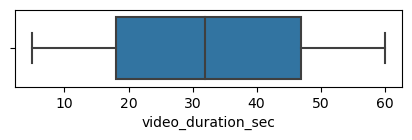

In [397]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize= (5,1))
ax = sns.boxplot(x= "video_duration_sec", data=data)
plt.show()


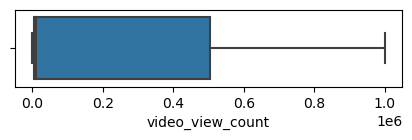

In [398]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize= (5,1))
ax = sns.boxplot(x= "video_view_count", data=data)
plt.show()



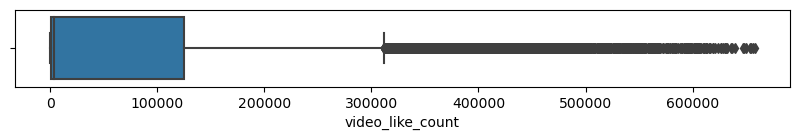

In [399]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize= (10,1))
ax = sns.boxplot(x= "video_like_count", data=data)
plt.show()



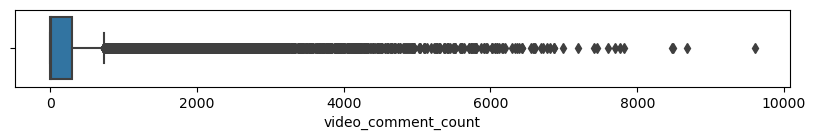

In [400]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize= (10,1))
ax = sns.boxplot(x= "video_comment_count", data=data)
plt.show()


In [401]:
# Check for and handle outliers for video_like_count

# col = "video_like_count"
# IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
# threshold = data[col].median() + (IQR * 1.5)
# print(f"Number of outliers, {col} : {data[data[col] > threshold].shape[0]}")


In [402]:
for col in data.columns:
    if not "count" in col: 
        continue
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    threshold = data[col].median() + (IQR * 1.5)
    print(f"Number of outliers, {col} : {data[data[col] > threshold].shape[0]}")
    data.loc[data[col] > threshold, col] = threshold

Number of outliers, video_view_count : 2343
Number of outliers, video_like_count : 3468
Number of outliers, video_share_count : 3732
Number of outliers, video_download_count : 3733
Number of outliers, video_comment_count : 3882


In [403]:
data.shape

(19084, 12)

Check class balance.

In [404]:
# Check class balance for video_comment_count
data.verified_status.value_counts(),data.verified_status.value_counts(normalize=True)


(verified_status
 not verified    17884
 verified         1200
 Name: count, dtype: int64,
 verified_status
 not verified    0.93712
 verified        0.06288
 Name: proportion, dtype: float64)

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [405]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
majority = data[data.verified_status == "not verified"]
minority = data[data.verified_status == "verified"]

# Upsample the minority class (which is "verified")

upsampled_minority = minority.sample(majority.shape[0], replace=True)

# Combine majority class with upsampled minority class
data = pd.concat([majority, upsampled_minority], axis=0)

# Display new class counts
data.verified_status.value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [406]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data[data.verified_status == "not verified"].video_transcription_text.apply(lambda x: len(x)).mean() , data[data.verified_status == "verified"].video_transcription_text.apply(lambda x: len(x)).mean()


(89.40114068441065, 84.5780585998658)

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [407]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data["text_length"] = data.video_transcription_text.apply(lambda x : len(x))


In [408]:
# Display first few rows of dataframe after adding new column
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.00,19425.000,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.00,77355.000,19034.0,1161.0,445.5,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,759031.25,97690.000,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.00,189717.375,27877.5,1234.0,445.5,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.00,34987.000,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

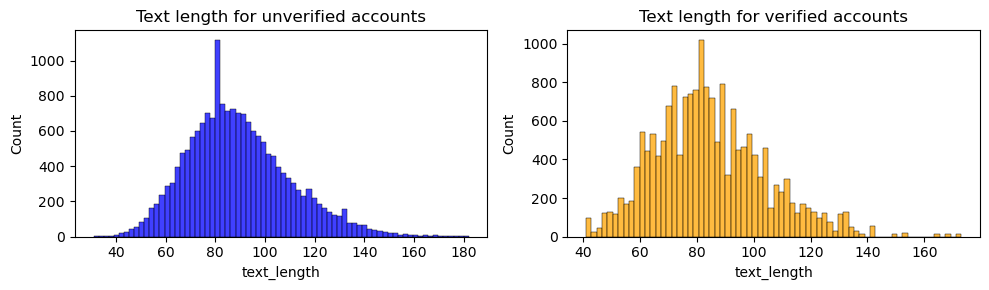

In [409]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data[data.verified_status == "not verified" ].text_length, color='blue', kde=False)
plt.title('Text length for unverified accounts')
plt.subplot(1, 2, 2)
sns.histplot(data[data.verified_status == "verified" ].text_length, color='orange', kde=False)
plt.title('Text length for verified accounts')
plt.tight_layout()
plt.show()


In [410]:
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

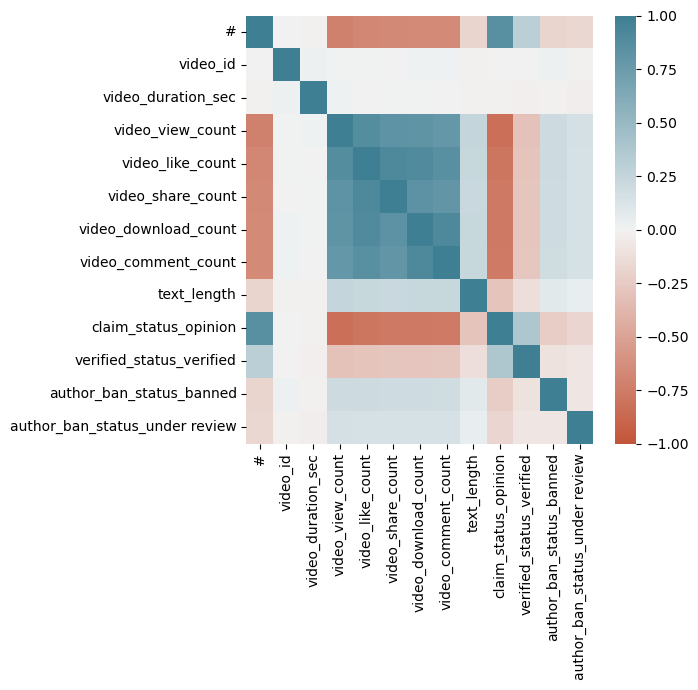

In [411]:
# Code a correlation matrix to help determine most correlated variables

categorical = ['claim_status', 'verified_status','author_ban_status']
encoded = pd.get_dummies(data=data, columns=categorical, drop_first=True).drop("video_transcription_text", axis=1)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(encoded.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()


Visualize a correlation heatmap of the data.

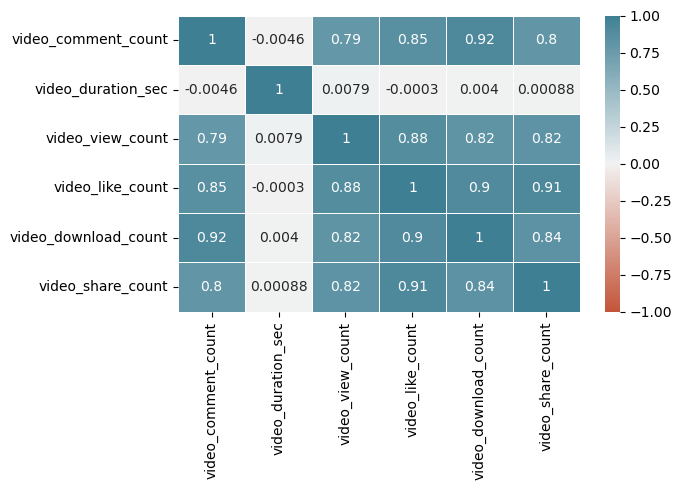

In [412]:
# Create a heatmap to visualize how correlated variables are
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(data[["video_comment_count",'video_duration_sec', "video_view_count","video_like_count","video_download_count", "video_share_count" ]].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True, linewidths=.5,
                 ax=ax)

plt.tight_layout()
plt.show()



One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?


**Answer**: Before dropping the outliers, these variables were highly correlated ; downloads and likes, downloads and comments, likes and shares


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [413]:
# Select outcome variable
y = data.verified_status


In [414]:
data.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

I decided to drop **downloads** and **shares** to reduce multicolinarity. **Note however** that when I removed the outliers (more than half the data), the multicolinearity was reduced by a lot, from ~85% to 45%. ***EDIT***: after seeing the exemplar, I went back and just transformed the outliers as well

Select the features.

In [415]:
# Select features
features = ["claim_status", "author_ban_status", "video_duration_sec", "video_view_count","video_like_count","video_comment_count","text_length"]
X = data[features]
# Display first few rows of features dataframe
X.head()


,claim_status,author_ban_status,video_duration_sec,video_view_count,video_like_count,video_comment_count,text_length
0,claim,under review,59,343296.00,19425.000,0.0,97
1,claim,active,32,140877.00,77355.000,445.5,107
2,claim,active,31,759031.25,97690.000,329.0,137
3,claim,active,25,437506.00,189717.375,445.5,131
4,claim,active,19,56167.00,34987.000,152.0,128


In [416]:
X.shape

(35768, 7)

### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [417]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Confirm that the dimensions of the training and testing sets are in alignment.

In [418]:
# Get shape of each training and testing set

X_train.shape, X_test.shape


((28614, 7), (7154, 7))

### **Task 3c. Encode variables**

Check the data types of the features.

In [419]:
# Check data types
X_train.dtypes


claim_status            object
author_ban_status       object
video_duration_sec       int64
video_view_count       float64
video_like_count       float64
video_comment_count    float64
text_length              int64
dtype: object

In [420]:
# Get unique values in `claim_status`
X.claim_status.unique()


array(['claim', 'opinion'], dtype=object)

In [421]:
# Get unique values in `author_ban_status`
X.author_ban_status.unique()


array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [422]:
# Select the training features that needs to be encoded

cat = ["claim_status", "author_ban_status"]


# Display first few rows
data[cat].head()


,claim_status,author_ban_status
0,claim,under review
1,claim,active
2,claim,active
3,claim,active
4,claim,active


In [423]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(drop='first', sparse=False)


In [424]:
# Fit and transform the training features using the encoder

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat]), columns=encoder.get_feature_names_out(cat))
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train.drop(columns=cat), X_train_encoded], axis=1)


/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [425]:
# Get feature names from encoder
### YOUR CODE HERE ###
encoder.get_feature_names_out(cat)


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [426]:
# Display first few rows of encoded training features
X_train.head()


,video_duration_sec,video_view_count,video_like_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,7,426615.0,35804.0,62.0,67,0.0,0.0,0.0
1,34,3062.0,545.0,0.0,82,1.0,0.0,0.0
2,51,8434.0,2355.0,1.0,109,1.0,0.0,0.0
3,54,50430.0,17672.0,94.0,83,0.0,0.0,0.0
4,44,576129.0,12813.0,129.0,95,0.0,0.0,1.0


In [427]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [428]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###


In [429]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###


Check the data type of the outcome variable.

In [430]:
# Check data type of outcome variable
y_train.info()


<class 'pandas.core.series.Series'>
Index: 28614 entries, 7111 to 7761
Series name: verified_status
Non-Null Count  Dtype 
--------------  ----- 
28614 non-null  object
dtypes: object(1)
memory usage: 447.1+ KB


In [431]:
# Get unique values of outcome variable
y_train.unique()


array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [432]:
# Set up an encoder for one-hot encoding the categorical outcome variable
encoder2 = OneHotEncoder(drop="first", sparse=False)


In [433]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model

y_train = encoder2.fit_transform(y_train.values.reshape(-1, 1))


# Display the encoded training outcome variable
y_train


/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [434]:
# Construct a logistic regression model and fit it to the training set
reg = LogisticRegression()
reg.fit(X_train, y_train)



/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [435]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [436]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###


# Display first few rows of encoded testing features
### YOUR CODE HERE ###


In [437]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###


# Display first few rows
### YOUR CODE HERE ###


In [438]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###


In [439]:
X_test.head()

,claim_status,author_ban_status,video_duration_sec,video_view_count,video_like_count,video_comment_count,text_length
13826,opinion,active,56,7022.0,1265.0,3.0,66
19026,opinion,active,57,2761.0,181.0,0.0,53
12384,opinion,active,26,6866.0,2250.0,2.0,101
10059,opinion,active,17,779.0,20.0,0.0,95
8800,claim,active,33,225146.0,92303.0,100.0,114


In [440]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###


X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat]), columns=encoder.get_feature_names_out(cat))
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test.drop(columns=cat), X_test_encoded], axis=1)
X_test.head()


,video_duration_sec,video_view_count,video_like_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,56,7022.0,1265.0,3.0,66,1.0,0.0,0.0
1,57,2761.0,181.0,0.0,53,1.0,0.0,0.0
2,26,6866.0,2250.0,2.0,101,1.0,0.0,0.0
3,17,779.0,20.0,0.0,95,1.0,0.0,0.0
4,33,225146.0,92303.0,100.0,114,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [441]:
# Use the logistic regression model to get predictions on the encoded testing set

y_preds = reg.predict(X_test)

Display the predictions on the encoded testing set.

In [442]:
# Display the predictions on the encoded testing set
y_preds


array([1., 1., 1., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [443]:
# Display the true labels of the testing set
y_test


13826        verified
19026    not verified
12384        verified
10059    not verified
8800     not verified
             ...     
17494        verified
18240    not verified
17897        verified
16955    not verified
9695         verified
Name: verified_status, Length: 7154, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [444]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###


y_test  =  encoder2.transform(y_test.values.reshape(-1, 1))

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [445]:
# Get shape of each training and testing set
X_train.shape, X_test.shape


((28614, 8), (7154, 8))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

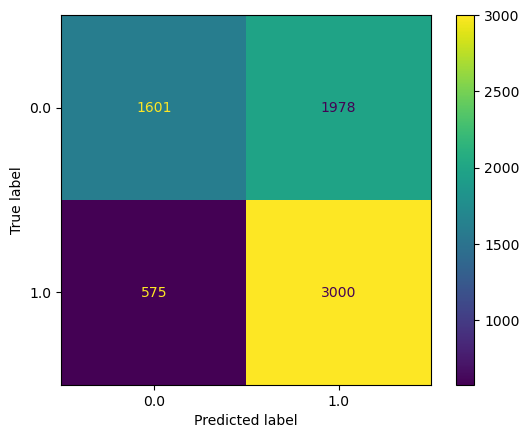

In [446]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test, y_preds, labels = reg.classes_)


# Create display of confusion matrix

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = reg.classes_)

# Plot confusion matrix

disp.plot()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [447]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(metrics.classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      3579
not verified       0.60      0.84      0.70      3575

    accuracy                           0.64      7154
   macro avg       0.67      0.64      0.63      7154
weighted avg       0.67      0.64      0.63      7154



### **Task 4c. Interpret model coefficients**

In [448]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":reg.feature_names_in_, "Model Coefficient":reg.coef_[0]})


,Feature Name,Model Coefficient
0,video_duration_sec,1.486939e-03
1,video_view_count,-2.102415e-06
2,video_like_count,-1.623286e-06
3,video_comment_count,-3.434100e-04
4,text_length,3.849430e-03
5,claim_status_opinion,6.158852e-05
6,author_ban_status_banned,-1.368549e-06
7,author_ban_status_under review,-4.732057e-07


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 